<a href="https://colab.research.google.com/github/diggajbishnoi/Projects/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Price Prediction:-


## About the dataset :-

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300153 datapoints and 11 features in the cleaned dataset.

FEATURES:-
The various features of the cleaned dataset are explained below:

(1) **Airline**:- The name of the airline comapny is stored in the column.It is a categorical feature having 6 different airlines.

(2) **Flight**:- Flight stores information regarding the plane's flight code. It is a categorical feature.

(3) **Source** **City**:- City from which the flight takes off. It is a categorical feature having 6 unique cities.

(4) **Departure** **Time**:- This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

(5) **Stops**:- A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

(6) **Arrival Time**-: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

(7)  **Destination City**:- City where the flight will land. It is a categorical feature having 6 unique cities.

(8) **Class**:- A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

(9)  **Duration**:- A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

(10) **Days Left:-** This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

(11) **Price:-** Target variable stores information of the ticket price.

### Import the files and read the data:-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Load and read the data

import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/diggajbishnoi/Projects/main/Flight_Dataset.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [ ]:
## defining the shape of the data:-

df.shape

(300153, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
print(df.dtypes)

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


### Occurence of unique values:-

In [ ]:
# unique values in airline :-

df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [ ]:
# unique values in source_city:-

df['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [ ]:
# unique values in destination_city:-

df['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [ ]:
# unique values in departure_time:-

df['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [ ]:
# unique values in arrival_time:-

df['arrival_time'].value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

In [ ]:
# unique values in stops:-

df['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [ ]:
# unique values in class:-

df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [ ]:
df['price'].mean()

20889.660523133203

In [ ]:
df['price'].median()

7425.0

In [ ]:
df['price'].max()

123071

In [ ]:
df['price'].min()

1105

### Finding the null values:-

In [ ]:
## detect the null values:-

df.isnull()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,False,False,False,False,False,False,False,False,False,False,False,False
300149,False,False,False,False,False,False,False,False,False,False,False,False
300150,False,False,False,False,False,False,False,False,False,False,False,False
300151,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,False,False,False,False,False,False,False,False,False,False,False,False
300149,False,False,False,False,False,False,False,False,False,False,False,False
300150,False,False,False,False,False,False,False,False,False,False,False,False
300151,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
df.isna().count()

Unnamed: 0          300153
airline             300153
flight              300153
source_city         300153
departure_time      300153
stops               300153
arrival_time        300153
destination_city    300153
class               300153
duration            300153
days_left           300153
price               300153
dtype: int64

In [ ]:
df.notnull()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,True,True,True,True,True,True,True,True,True,True,True,True
300149,True,True,True,True,True,True,True,True,True,True,True,True
300150,True,True,True,True,True,True,True,True,True,True,True,True
300151,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
## drop all the null values:-

df.dropna()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df.dropna().count()

Unnamed: 0          300153
airline             300153
flight              300153
source_city         300153
departure_time      300153
stops               300153
arrival_time        300153
destination_city    300153
class               300153
duration            300153
days_left           300153
price               300153
dtype: int64

In [ ]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
df.notnull()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,True,True,True,True,True,True,True,True,True,True,True,True
300149,True,True,True,True,True,True,True,True,True,True,True,True
300150,True,True,True,True,True,True,True,True,True,True,True,True
300151,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
df.notnull().sum()

Unnamed: 0          300153
airline             300153
flight              300153
source_city         300153
departure_time      300153
stops               300153
arrival_time        300153
destination_city    300153
class               300153
duration            300153
days_left           300153
price               300153
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Visualisation of Dataset:-

<ipython-input-30-e7b8cccc5fbc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

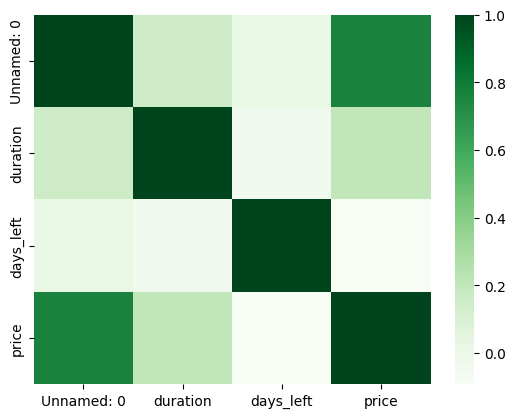

In [ ]:
import pandas as pd
import seaborn as sns
corr=df.corr()
sns.heatmap(corr,cmap="Greens")

In [ ]:
df.shape

(300153, 12)

## EDA:-

In [ ]:
df1=df.drop(['Unnamed: 0','flight','duration','days_left'],axis=1)


In [ ]:
df1.airline.replace(['SpiceJet','AirAsia','Vistara','Air_India','Indigo','GO_FIRST'],[1,2,3,4,5,6],inplace=True)
df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,price
0,1,Delhi,Evening,zero,Night,Mumbai,Economy,5953
1,1,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,5953
2,2,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,5956
3,3,Delhi,Morning,zero,Afternoon,Mumbai,Economy,5955
4,3,Delhi,Morning,zero,Morning,Mumbai,Economy,5955
...,...,...,...,...,...,...,...,...
300148,3,Chennai,Morning,one,Evening,Hyderabad,Business,69265
300149,3,Chennai,Afternoon,one,Night,Hyderabad,Business,77105
300150,3,Chennai,Early_Morning,one,Night,Hyderabad,Business,79099
300151,3,Chennai,Early_Morning,one,Evening,Hyderabad,Business,81585


In [ ]:
df1.source_city.replace(['Delhi','Mumbai','Bangalore','Kolkata','Hyderabad','Chennai'],[1,2,3,4,5,6],inplace=True)
df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,price
0,1,1,Evening,zero,Night,Mumbai,Economy,5953
1,1,1,Early_Morning,zero,Morning,Mumbai,Economy,5953
2,2,1,Early_Morning,zero,Early_Morning,Mumbai,Economy,5956
3,3,1,Morning,zero,Afternoon,Mumbai,Economy,5955
4,3,1,Morning,zero,Morning,Mumbai,Economy,5955
...,...,...,...,...,...,...,...,...
300148,3,6,Morning,one,Evening,Hyderabad,Business,69265
300149,3,6,Afternoon,one,Night,Hyderabad,Business,77105
300150,3,6,Early_Morning,one,Night,Hyderabad,Business,79099
300151,3,6,Early_Morning,one,Evening,Hyderabad,Business,81585


In [ ]:
df1.destination_city.replace(['Delhi','Mumbai','Kolkata','Bangalore','Hyderabad','Chennai'],[1,2,3,4,5,6],inplace=True)
df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,price
0,1,1,Evening,zero,Night,2,Economy,5953
1,1,1,Early_Morning,zero,Morning,2,Economy,5953
2,2,1,Early_Morning,zero,Early_Morning,2,Economy,5956
3,3,1,Morning,zero,Afternoon,2,Economy,5955
4,3,1,Morning,zero,Morning,2,Economy,5955
...,...,...,...,...,...,...,...,...
300148,3,6,Morning,one,Evening,5,Business,69265
300149,3,6,Afternoon,one,Night,5,Business,77105
300150,3,6,Early_Morning,one,Night,5,Business,79099
300151,3,6,Early_Morning,one,Evening,5,Business,81585


In [ ]:
df1.departure_time.replace(['Evening','Early_Morning','Morning','Afternoon','Night','Late_Night'],[1,2,3,4,5,6],inplace=True)
df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,price
0,1,1,1,zero,Night,2,Economy,5953
1,1,1,2,zero,Morning,2,Economy,5953
2,2,1,2,zero,Early_Morning,2,Economy,5956
3,3,1,3,zero,Afternoon,2,Economy,5955
4,3,1,3,zero,Morning,2,Economy,5955
...,...,...,...,...,...,...,...,...
300148,3,6,3,one,Evening,5,Business,69265
300149,3,6,4,one,Night,5,Business,77105
300150,3,6,2,one,Night,5,Business,79099
300151,3,6,2,one,Evening,5,Business,81585


In [ ]:
df1.arrival_time.replace(['Night','Morning','Early_Morning','Afternoon','Late_Night','Evening'],[1,2,3,4,5,6],inplace=True)
df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,price
0,1,1,1,zero,1,2,Economy,5953
1,1,1,2,zero,2,2,Economy,5953
2,2,1,2,zero,3,2,Economy,5956
3,3,1,3,zero,4,2,Economy,5955
4,3,1,3,zero,2,2,Economy,5955
...,...,...,...,...,...,...,...,...
300148,3,6,3,one,6,5,Business,69265
300149,3,6,4,one,1,5,Business,77105
300150,3,6,2,one,1,5,Business,79099
300151,3,6,2,one,6,5,Business,81585


In [ ]:
df1.rename(columns={'class':'CLASS'},inplace=True)
df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,CLASS,price
0,1,1,1,zero,1,2,Economy,5953
1,1,1,2,zero,2,2,Economy,5953
2,2,1,2,zero,3,2,Economy,5956
3,3,1,3,zero,4,2,Economy,5955
4,3,1,3,zero,2,2,Economy,5955
...,...,...,...,...,...,...,...,...
300148,3,6,3,one,6,5,Business,69265
300149,3,6,4,one,1,5,Business,77105
300150,3,6,2,one,1,5,Business,79099
300151,3,6,2,one,6,5,Business,81585


In [ ]:
df1.CLASS.replace(['Economy','Business'],[1,2],inplace=True)
df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,CLASS,price
0,1,1,1,zero,1,2,1,5953
1,1,1,2,zero,2,2,1,5953
2,2,1,2,zero,3,2,1,5956
3,3,1,3,zero,4,2,1,5955
4,3,1,3,zero,2,2,1,5955
...,...,...,...,...,...,...,...,...
300148,3,6,3,one,6,5,2,69265
300149,3,6,4,one,1,5,2,77105
300150,3,6,2,one,1,5,2,79099
300151,3,6,2,one,6,5,2,81585


In [ ]:
df1.stops.replace(['one','zero','two_or_more'],[1,2,3],inplace=True)
df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,CLASS,price
0,1,1,1,2,1,2,1,5953
1,1,1,2,2,2,2,1,5953
2,2,1,2,2,3,2,1,5956
3,3,1,3,2,4,2,1,5955
4,3,1,3,2,2,2,1,5955
...,...,...,...,...,...,...,...,...
300148,3,6,3,1,6,5,2,69265
300149,3,6,4,1,1,5,2,77105
300150,3,6,2,1,1,5,2,79099
300151,3,6,2,1,6,5,2,81585


In [ ]:
df1.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,CLASS,price
0,1,1,1,2,1,2,1,5953
1,1,1,2,2,2,2,1,5953
2,2,1,2,2,3,2,1,5956
3,3,1,3,2,4,2,1,5955
4,3,1,3,2,2,2,1,5955


In [ ]:
df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,CLASS,price
0,1,1,1,2,1,2,1,5953
1,1,1,2,2,2,2,1,5953
2,2,1,2,2,3,2,1,5956
3,3,1,3,2,4,2,1,5955
4,3,1,3,2,2,2,1,5955
...,...,...,...,...,...,...,...,...
300148,3,6,3,1,6,5,2,69265
300149,3,6,4,1,1,5,2,77105
300150,3,6,2,1,1,5,2,79099
300151,3,6,2,1,6,5,2,81585


In [ ]:
df1.to_csv("Fly_csv")
df2= pd.read_csv("Fly_csv")
print(df2)

        Unnamed: 0  airline  source_city  departure_time  stops  arrival_time  \
0                0        1            1               1      2             1   
1                1        1            1               2      2             2   
2                2        2            1               2      2             3   
3                3        3            1               3      2             4   
4                4        3            1               3      2             2   
...            ...      ...          ...             ...    ...           ...   
300148      300148        3            6               3      1             6   
300149      300149        3            6               4      1             1   
300150      300150        3            6               2      1             1   
300151      300151        3            6               2      1             6   
300152      300152        3            6               3      1             6   

        destination_city  C

In [ ]:
df2.drop(['Unnamed: 0'],inplace=True,axis=1)


In [ ]:
df2

,airline,source_city,departure_time,stops,arrival_time,destination_city,CLASS,price
0,1,1,1,2,1,2,1,5953
1,1,1,2,2,2,2,1,5953
2,2,1,2,2,3,2,1,5956
3,3,1,3,2,4,2,1,5955
4,3,1,3,2,2,2,1,5955
...,...,...,...,...,...,...,...,...
300148,3,6,3,1,6,5,2,69265
300149,3,6,4,1,1,5,2,77105
300150,3,6,2,1,1,5,2,79099
300151,3,6,2,1,6,5,2,81585


In [ ]:
df2.shape

(300153, 8)

In [ ]:
df2.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,CLASS,price
0,1,1,1,2,1,2,1,5953
1,1,1,2,2,2,2,1,5953
2,2,1,2,2,3,2,1,5956
3,3,1,3,2,4,2,1,5955
4,3,1,3,2,2,2,1,5955


In [ ]:
df2.tail()

,airline,source_city,departure_time,stops,arrival_time,destination_city,CLASS,price
300148,3,6,3,1,6,5,2,69265
300149,3,6,4,1,1,5,2,77105
300150,3,6,2,1,1,5,2,79099
300151,3,6,2,1,6,5,2,81585
300152,3,6,3,1,6,5,2,81585


## Data Split:-

In [ ]:
data=df2.values
data

array([[    1,     1,     1, ...,     2,     1,  5953],
       [    1,     1,     2, ...,     2,     1,  5953],
       [    2,     1,     2, ...,     2,     1,  5956],
       ...,
       [    3,     6,     2, ...,     5,     2, 79099],
       [    3,     6,     2, ...,     5,     2, 81585],
       [    3,     6,     3, ...,     5,     2, 81585]])

In [ ]:
X=data[:,[0,1,2,3,4,5,6]]
X

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 6, 2, ..., 1, 5, 2],
       [3, 6, 2, ..., 6, 5, 2],
       [3, 6, 3, ..., 6, 5, 2]])

In [ ]:
print(X.shape)

(300153, 7)


In [ ]:
Y=data[:,7]
Y

array([ 5953,  5953,  5956, ..., 79099, 81585, 81585])

In [ ]:
print(Y.shape)

(300153,)


In [ ]:
X[0]

array([1, 1, 1, 2, 1, 2, 1])

In [ ]:
X[4]

array([3, 1, 3, 2, 2, 2, 1])

In [ ]:
Y[1]

5953

In [ ]:
Y[6]

6060

In [ ]:
X[:50000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 2, 2, ..., 4, 1, 1],
       [3, 2, 1, ..., 1, 1, 1],
       [3, 2, 3, ..., 1, 1, 1]])

In [ ]:
X[:75000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [4, 2, 3, ..., 6, 5, 1],
       [4, 2, 3, ..., 1, 5, 1],
       [6, 2, 2, ..., 6, 5, 1]])

In [ ]:
X[:80000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [4, 2, 4, ..., 1, 6, 1],
       [4, 2, 4, ..., 1, 6, 1],
       [4, 2, 3, ..., 1, 6, 1]])

In [ ]:
X[:90000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [6, 3, 1, ..., 5, 1, 1],
       [6, 3, 1, ..., 5, 1, 1],
       [6, 3, 4, ..., 1, 1, 1]])

In [ ]:
X[:100000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 3, 2, ..., 1, 2, 1],
       [3, 3, 2, ..., 1, 2, 1],
       [3, 3, 1, ..., 2, 2, 1]])

In [ ]:
X[:120000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [4, 4, 3, ..., 6, 1, 1],
       [4, 4, 3, ..., 1, 1, 1],
       [4, 4, 3, ..., 1, 1, 1]])

In [ ]:
X[:200000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 6, 3, ..., 6, 3, 1],
       [3, 6, 2, ..., 6, 3, 1],
       [5, 6, 3, ..., 6, 3, 1]])

In [ ]:
X[:220000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 1, 1, ..., 4, 5, 2],
       [3, 1, 3, ..., 3, 5, 2],
       [3, 1, 1, ..., 3, 5, 2]])

In [ ]:
X[:240000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 2, 3, ..., 1, 5, 2],
       [3, 2, 5, ..., 2, 5, 2],
       [3, 2, 5, ..., 4, 5, 2]])

In [ ]:
X[:250000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 3, 2, ..., 4, 2, 2],
       [3, 3, 3, ..., 6, 2, 2],
       [3, 3, 2, ..., 4, 2, 2]])

In [ ]:
X[:260000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 3, 2, ..., 6, 6, 2],
       [3, 3, 3, ..., 1, 6, 2],
       [3, 3, 3, ..., 1, 6, 2]])

In [ ]:
X[:266000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 4, 3, ..., 1, 2, 2],
       [3, 4, 3, ..., 1, 2, 2],
       [3, 4, 2, ..., 1, 2, 2]])

In [ ]:
X[:267000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 4, 1, ..., 2, 2, 2],
       [3, 4, 5, ..., 2, 2, 2],
       [3, 4, 5, ..., 4, 2, 2]])

In [ ]:
X[:268000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 4, 2, ..., 6, 4, 2],
       [3, 4, 5, ..., 2, 4, 2],
       [3, 4, 3, ..., 1, 4, 2]])

In [ ]:
X[:269000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 4, 3, ..., 1, 4, 2],
       [3, 4, 2, ..., 6, 4, 2],
       [3, 4, 3, ..., 1, 4, 2]])

In [ ]:
X[:270000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 4, 1, ..., 2, 4, 2],
       [3, 4, 5, ..., 2, 4, 2],
       [3, 4, 2, ..., 1, 4, 2]])

In [ ]:
X[:280000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 5, 2, ..., 1, 2, 2],
       [3, 5, 5, ..., 4, 2, 2],
       [3, 5, 5, ..., 4, 2, 2]])

In [ ]:
X[:290000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 6, 4, ..., 1, 1, 2],
       [3, 6, 4, ..., 1, 1, 2],
       [3, 6, 3, ..., 1, 1, 2]])

In [ ]:
X[:295000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 6, 2, ..., 1, 4, 2],
       [3, 6, 4, ..., 3, 4, 2],
       [3, 6, 4, ..., 2, 4, 2]])

In [ ]:
X[:300000]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 6, 2, ..., 1, 5, 2],
       [3, 6, 5, ..., 4, 5, 2],
       [3, 6, 4, ..., 3, 5, 2]])

In [ ]:
X[:300153]

array([[1, 1, 1, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1],
       [2, 1, 2, ..., 3, 2, 1],
       ...,
       [3, 6, 2, ..., 1, 5, 2],
       [3, 6, 2, ..., 6, 5, 2],
       [3, 6, 3, ..., 6, 5, 2]])

In [ ]:
Y[:100000]

array([5953, 5953, 5956, ..., 7212, 7212, 7212])

In [ ]:
Y[:150000]

array([5953, 5953, 5956, ..., 5465, 5465, 5570])

In [ ]:
Y[:200000]

array([5953, 5953, 5956, ..., 7344, 7344, 7031])

In [ ]:
Y[:220000]

array([ 5953,  5953,  5956, ..., 53937, 53937, 59537])

In [ ]:
Y[:250000]

array([ 5953,  5953,  5956, ..., 67004, 67004, 67004])

In [ ]:
Y[:300000]

array([ 5953,  5953,  5956, ..., 41064, 41064, 41064])

## Apply different models to check acuracy:-

### (I) Linear Regression:-

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.20,shuffle=True,random_state=42)
print("X_train:",X_train.shape)
print("Y_train:",Y_train.shape)
print("X_test:",X_test.shape)
print("Y_test:",Y_test.shape)

X_train: (240122, 7)
Y_train: (240122,)
X_test: (60031, 7)
Y_test: (60031,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model.predict([[1,6, 2, 1, 1, 5, 2]])

array([55910.33130117])

In [ ]:
model.predict([[2,6, 2, 1, 6, 5, 2]])

array([55508.96960631])

In [ ]:
model.predict([[3,1, 2, 2, 3, 2, 1]])

array([4515.39388341])

In [ ]:
model.predict([[4,3, 2, 1, 1, 2, 1]])

array([6567.74622427])

In [ ]:
prediction=model.predict(X_test)
prediction

array([ 6242.6595713 , 52763.05421412,  8078.97988292, ...,
        7749.18578741,  4845.56737967, 52832.09366639])

In [ ]:
Y_test

array([ 7366, 64831,  6195, ...,  6734,  5082, 66465])

In [ ]:
score=(r2_score(Y_test,prediction))*100
score

88.45470120748547

### (II) Decision Tree Regression:-

In [ ]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
model2= DecisionTreeRegressor()
model2

DecisionTreeRegressor()

In [ ]:
model2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
prediction2=model2.predict(X_test)
prediction2


array([10688.53846154, 67323.74736842,  9528.43      , ...,
        8841.8       ,  5592.29032258, 71606.        ])

In [ ]:
Y_test

array([ 7366, 64831,  6195, ...,  6734,  5082, 66465])

In [ ]:
score2=(r2_score(Y_test,prediction2))*100
print(score2,"%")

95.90502035676634 %


### (III) Kneighbor Regressor:-

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
model3=KNeighborsRegressor()
model3

KNeighborsRegressor()

In [ ]:
model3.fit(X_train,Y_train)

KNeighborsRegressor()

In [ ]:
prediction3=model3.predict(X_test)
prediction3

array([11886. , 69090.6, 13246.2, ...,  9147.8,  6118.6, 73895.2])

In [ ]:
Y_test

array([ 7366, 64831,  6195, ...,  6734,  5082, 66465])

In [ ]:
score3=(r2_score(Y_test,prediction3))*100
print(score3,"%")

95.016231977292 %


### (IV) Random Forest Regressor:-

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
model4=RandomForestRegressor()
model4

RandomForestRegressor()

In [ ]:
model4.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
prediction4=model4.predict(X_test)
prediction4

array([10691.31797248, 67346.52230769,  9511.7324457 , ...,
        8837.29497347,  5580.04442609, 71713.47859416])

In [ ]:
Y_test

array([ 7366, 64831,  6195, ...,  6734,  5082, 66465])

In [ ]:
score4=(r2_score(Y_test,prediction4))*100
print(score4,"%")

95.91092182279789 %


In [ ]:
### Now we will  select this model this Random Forest Regressor because of high accuracy :-

In [ ]:
airline=eval(input("Enter the airline you want to travel : "))
source_city = eval(input("Enter your source city : "))
departure_time = eval(input("Enter your departure time : "))
stops = eval(input("Enter the number of stops you want to take : "))
arrival_time = eval(input("Enter your arrival time : "))
destination_city = eval(input("Enter your destination city : "))
CLASS = eval(input("Enter your CLASS in which you want to travel : "))
prediction4=model4.predict([[airline,source_city,departure_time,stops,arrival_time,destination_city,CLASS]])
print("The fare of your flight is ",prediction4)

Enter the airline you want to travel : 5
Enter your source city : 4
Enter your departure time : 2
Enter the number of stops you want to take : 1
Enter your arrival time : 4
Enter your destination city : 6
Enter your CLASS in which you want to travel : 2
The fare of your flight is  [43040.39]
